In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
gender = pd.read_csv("data/original/gender.csv")
display(gender.shape)
gender.head()

(12000, 2)

,customer_id,gender
0,6740969,1.0
1,36599781,0.0
2,91453656,1.0
3,17431962,1.0
4,72568668,1.0


In [3]:
gender.dtypes

customer_id      int64
gender         float64
dtype: object

In [4]:
gender.isna().sum()

customer_id       0
gender         3600
dtype: int64

In [5]:
train_clients = gender[gender["gender"].isna() == False].copy()
train_clients_set = set(train_clients["customer_id"].to_list())
test_clients = gender[gender["gender"].isna() == True].copy()
test_clients_set = set(test_clients["customer_id"].to_list())

In [6]:
display(len(train_clients_set))
display(len(test_clients_set))

8400

3600

In [7]:
gender["gender"].unique()

array([ 1.,  0., nan])

In [8]:
gender[gender["gender"].isna()]["customer_id"]

8400     11259870
8401     93683614
8402     97232810
8403     53099781
8404     59012522
           ...   
11995    37415294
11996    53882112
11997    70027904
11998    16393345
11999    82234503
Name: customer_id, Length: 3600, dtype: int64

In [9]:
transactions = pd.read_csv("data/original/transactions.csv")
display(transactions.shape)
transactions.head()

(6849346, 6)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


In [10]:
mcc_codes = pd.read_csv("data/original/tr_mcc_codes.csv", delimiter=";")
display(mcc_codes.shape)
mcc_codes.head()

(184, 2)

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [11]:
mcc_codes.dtypes

mcc_code            int64
mcc_description    object
dtype: object

In [12]:
mcc_codes.isna().sum()

mcc_code           0
mcc_description    0
dtype: int64

In [13]:
mcc_codes[mcc_codes["mcc_description"] == ""]

,mcc_code,mcc_description


In [14]:
tr_types = pd.read_csv("data/original/tr_types.csv", delimiter=";")
display(tr_types.shape)
tr_types.head()

(155, 2)

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [15]:
tr_types.dtypes

tr_type            int64
tr_description    object
dtype: object

In [16]:
tr_types.isna().sum()

tr_type           0
tr_description    0
dtype: int64

In [17]:
tr_types[tr_types["tr_description"] == ""]

,tr_type,tr_description


In [18]:
df = transactions.merge(gender, on="customer_id", how="left")
df.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1.0
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1.0
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1.0
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,1.0


In [19]:
df["customer_id"].nunique()

15000

In [20]:
df["customer_id"].isna().sum()

np.int64(0)

In [21]:
strange_customers = (
    set(df["customer_id"].to_list()) - train_clients_set - test_clients_set
)
display(len(strange_customers))
display(
    df[df["customer_id"].isin(strange_customers.union(test_clients_set))][
        "gender"
    ].shape
)
3118632 / df.shape[0]

3000

(3118632,)

0.4553182157829375

> * В датасете transactions 3000 id, которых нет в gender, + 3600 клиентов с неизвестным полов в genders. Итого 6600 клиентов с неизвестным полом и 3 118 632 (~45%) транзакций, у которых неизвестен пол клиентов

In [22]:
df["gender"].isna().sum()

np.int64(3118632)

In [23]:
df = df.merge(mcc_codes, on="mcc_code", how="left")

In [24]:
df = df.merge(tr_types, on="tr_type", how="left")

In [25]:
df.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1.0,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке)
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1.0,Денежные переводы,Списание с карты по операции “перевода с карты...
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ


In [26]:
df.isna().sum()

customer_id              0
tr_datetime              0
mcc_code                 0
tr_type                  0
amount                   0
term_id            2765195
gender             3118632
mcc_description          0
tr_description        2766
dtype: int64

In [27]:
gender_na_customers = strange_customers.union(test_clients_set)

In [28]:
set(df[df["customer_id"].isin(gender_na_customers)]["mcc_description"].unique()) == set(
    df[df["customer_id"].isin(train_clients_set)]["mcc_description"].unique()
)

True

In [29]:
df[df["tr_description"].isna()]["customer_id"].nunique()

521

In [30]:
df["tr_datetime"].dtype

dtype('O')

In [31]:
df["tr_datetime"].dtypes

dtype('O')

In [32]:
def correct_datetime(string):
    day = int(string[: string.find(" ")])
    time_str = string[string.find(" ") + 1 :]
    time_list = time_str.split(":")
    if int(time_list[2]) == 60:
        time_list[2] = "00"
        time_list[1] = str(int(time_list[1]) + 1)
        if len(time_list[1]) == 1:
            time_list[1] = "0" + time_list[1]
    if int(time_list[1]) == 60:
        time_list[1] = "00"
        time_list[0] = str(int(time_list[0]) + 1)
        if len(time_list[0]) == 1:
            time_list[0] = "0" + time_list[0]
    if int(time_list[0]) == 24:
        day += 1
        time_list[0] = "00"
    result = str(day) + " " + ":".join(time_list)
    return result

In [33]:
df["tr_datetime"] = df["tr_datetime"].apply(correct_datetime)

In [34]:
df["day"] = df["tr_datetime"].apply(lambda x: int(x[: x.find(" ")]))
df.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1.0,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),1
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1.0,Денежные переводы,Списание с карты по операции “перевода с карты...,1
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,2


In [35]:
display(df["day"].max())
display(df["day"].min())
df["day"].dtype

np.int64(456)

np.int64(0)

dtype('int64')

In [36]:
df["time_str"] = df["tr_datetime"].str.split(" ").str[1]

df["time"] = pd.to_datetime(df["time_str"], format="%H:%M:%S", errors="coerce")

In [37]:
df["time"] = df["time"].dt.time

In [38]:
df.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,day,time_str,time
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,10:23:26,10:23:26
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1.0,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),1,10:19:29,10:19:29
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1.0,Денежные переводы,Списание с карты по операции “перевода с карты...,1,10:20:56,10:20:56
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1,10:39:54,10:39:54
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,2,15:33:42,15:33:42


In [39]:
df.isna().sum()

customer_id              0
tr_datetime              0
mcc_code                 0
tr_type                  0
amount                   0
term_id            2765195
gender             3118632
mcc_description          0
tr_description        2766
day                      0
time_str                 0
time                     0
dtype: int64

In [40]:
df["tr_description"] = df["tr_description"].fillna("Неизвестно")

In [41]:
df.isna().sum()

customer_id              0
tr_datetime              0
mcc_code                 0
tr_type                  0
amount                   0
term_id            2765195
gender             3118632
mcc_description          0
tr_description           0
day                      0
time_str                 0
time                     0
dtype: int64

In [42]:
df = df.drop(columns=["term_id", "tr_datetime", "mcc_code", "tr_type"], axis=1)
df = df.drop(columns=["time_str"], axis=1)
df.head()

,customer_id,amount,gender,mcc_description,tr_description,day,time
0,39026145,-2245.92,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,10:23:26
1,39026145,56147.89,1.0,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),1,10:19:29
2,39026145,-56147.89,1.0,Денежные переводы,Списание с карты по операции “перевода с карты...,1,10:20:56
3,39026145,-1392.47,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1,10:39:54
4,39026145,-920.83,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,2,15:33:42


In [43]:
df["seconds"] = df["time"].apply(lambda t: t.hour * 3600 + t.minute * 60 + t.second)

# Определяем интервалы (в секундах)
bins = [
    0,
    6 * 3600,
    9 * 3600,
    18 * 3600,
    22 * 3600,
    24 * 3600,
]  # 0–6, 6–9, 9–18, 18–22, 22–24
labels = ["ночь_1", "утро", "рабочее время", "вечер", "ночь_2"]

# Разбиваем на категории
df["time_category_temp"] = pd.cut(
    df["seconds"], bins=bins, labels=labels, right=False, include_lowest=True
)

# Объединяем категории "ночь_1" и "ночь_2"
df["time_category"] = df["time_category_temp"].map(
    {
        "ночь_1": "ночь",
        "утро": "утро",
        "рабочее время": "рабочее время",
        "вечер": "вечер",
        "ночь_2": "ночь",
    }
)

df = df.drop(columns=["time_category_temp", "seconds"])
df.head()

,customer_id,amount,gender,mcc_description,tr_description,day,time,time_category
0,39026145,-2245.92,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,10:23:26,рабочее время
1,39026145,56147.89,1.0,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),1,10:19:29,рабочее время
2,39026145,-56147.89,1.0,Денежные переводы,Списание с карты по операции “перевода с карты...,1,10:20:56,рабочее время
3,39026145,-1392.47,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,1,10:39:54,рабочее время
4,39026145,-920.83,1.0,"Различные продовольственные магазины — рынки, ...",Покупка. POS ТУ СБ РФ,2,15:33:42,рабочее время


In [44]:
df["time"].dtypes

dtype('O')

In [45]:
train_df = df[df["customer_id"].isin(train_clients_set)].copy()
test_df = df[df["customer_id"].isin(train_clients_set) == False].copy()
display(df.shape)
display(train_df.shape)
display(test_df.shape)
train_df.shape[0] + test_df.shape[0] == df.shape[0]

(6849346, 8)

(3730714, 8)

(3118632, 8)

True

In [46]:
display(train_df[train_df["gender"] == 1]["gender"].count())
display(train_df[train_df["gender"] == 0]["gender"].count())

np.int64(1714430)

np.int64(2016284)

In [47]:
display(df["mcc_description"].apply(lambda x: len(x.split())).max())
display(df["tr_description"].apply(lambda x: len(str(x).split())).max())

np.int64(17)

np.int64(18)

In [48]:
x = train_df[train_df["gender"] == 1]["gender"].count() / train_df.shape[0]
data = [x, 1 - x]

''

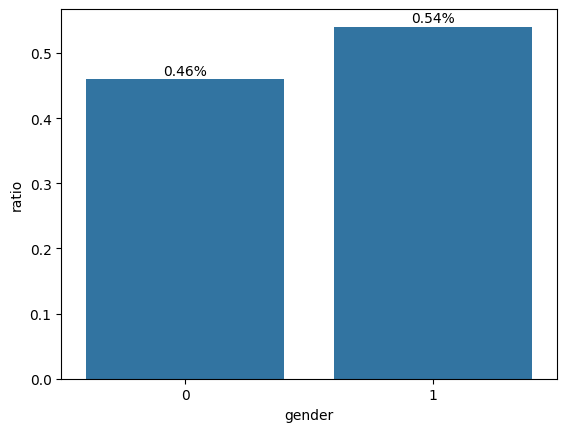

In [49]:
ax = sns.barplot(data=data)
ax.set_xlabel('gender')
ax.set_ylabel('ratio')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=1)
;

In [50]:
df.to_parquet("data/processed/df.parquet", engine="pyarrow")